In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx
from pyproj import CRS, Transformer
from matplotlib.colors import Normalize, ListedColormap
from shapely.geometry import Point
from scipy.cluster.hierarchy import dendrogram


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
filename = 'soil_samples.csv'
element = 'Mn (ppm)'

df = pd.read_csv(filename, na_values='< LOD')  
# Apply filters to limit the values
#df = df[(df['y'] <= 53.36) & (df['x'] >= -60.55)]
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['x'], df['y']), crs='EPSG:4326')
gdf_mercator = gdf.to_crs(epsg=3857) # Convert coordinate reference system


x limits: (-60.5868943985, -60.3124277115)
y limits: (53.2619846115, 53.403058698500004)


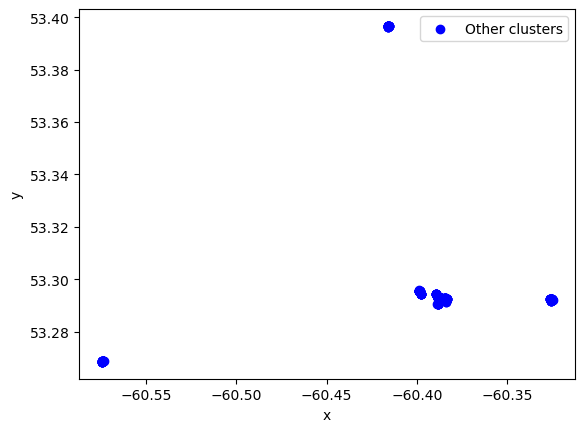

In [9]:
# Plot the points
plt.figure()
plt.scatter(gdf_mercator['x'], gdf_mercator['y'], c='blue', label='Other clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
print("x limits:",  plt.xlim())
print("y limits:", plt.ylim())

In [11]:
idx = gdf_mercator['x']<-60.55
print(gdf_mercator['y'][idx])

185    53.268720
186    53.268685
187    53.268721
188    53.268713
189    53.268778
190    53.268814
191    53.268742
192    53.268761
193    53.268470
194    53.268489
195    53.268506
196    53.268440
197    53.268397
198    53.268474
199    53.268465
200    53.268514
201    53.268572
202    53.268626
203    53.268667
204    53.268711
205    53.268646
206    53.268672
207    53.268580
208    53.268602
209    53.268582
Name: y, dtype: float64


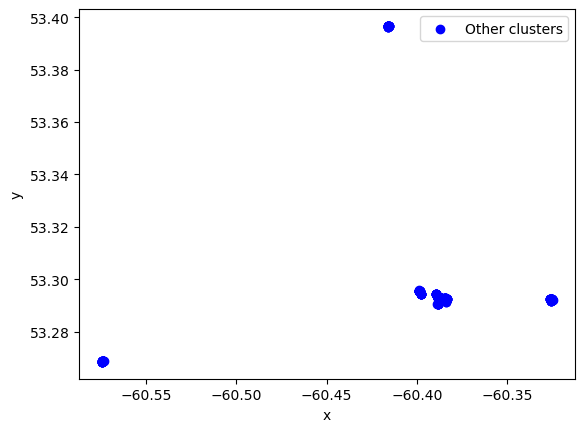